In [1]:
from nuscenes_utils import *

Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 26.059 seconds.
Reverse indexing ...
Done reverse indexing in 7.6 seconds.


In [2]:
scene_num = 42
s = Scene('scene-%s' % str(scene_num).zfill(4))
s.extract_data(map=True)
s.segment_actions()
s.rich_actions

LANE_CHANGE
 index: [ 16 18 ] time: [ 7.90069 8.899322 ]
LANE_CHANGE
 index: [ 16 22 ] time: [ 7.90069 10.89828 ]
LANE_CHANGE
 index: [ 22 28 ] time: [ 10.89828 13.798558 ]
LANE_CHANGE
 index: [ 28 34 ] time: [ 13.798558 16.750819 ]
LANE_CHANGE
 index: [ 36 38 ] time: [ 17.651024 18.550696 ]
OVERTAKE:  change lane left 38 change lane right 28


[{'label': 'drive straight', 'index': 0, 'time': 0.0},
 {'label': 'decelerate', 'index': 6, 'time': 2.898603},
 {'label': 'drive straight', 'index': 7, 'time': 3.397923},
 {'label': 'accelerate', 'index': 9, 'time': 4.399348},
 {'label': 'drive straight', 'index': 13, 'time': 6.401609},
 {'label': 'accelerate', 'index': 14, 'time': 6.90152},
 {'label': 'change lane left', 'index': 16, 'time': 7.90069},
 {'label': 'overtake', 'index': 38, 'time': 18.550696},
 {'label': 'change lane right', 'index': 36, 'time': 17.651024},
 {'label': 'accelerate', 'index': 39, 'time': 19.000249},
 {'label': 'END', 'index': 40, 'time': 19.500124}]

[(0.0, 2.898603, 'blue'), (2.898603, 3.397923, 'yellow'), (3.397923, 4.399348, 'blue'), (4.399348, 6.401609, 'green'), (6.401609, 6.90152, 'blue'), (6.90152, 7.90069, 'green'), (7.90069, 18.550696, 'Salmon'), (18.550696, 17.651024, 'aquamarine'), (17.651024, 19.000249, 'Salmon'), (19.000249, 19.500124, 'green')]


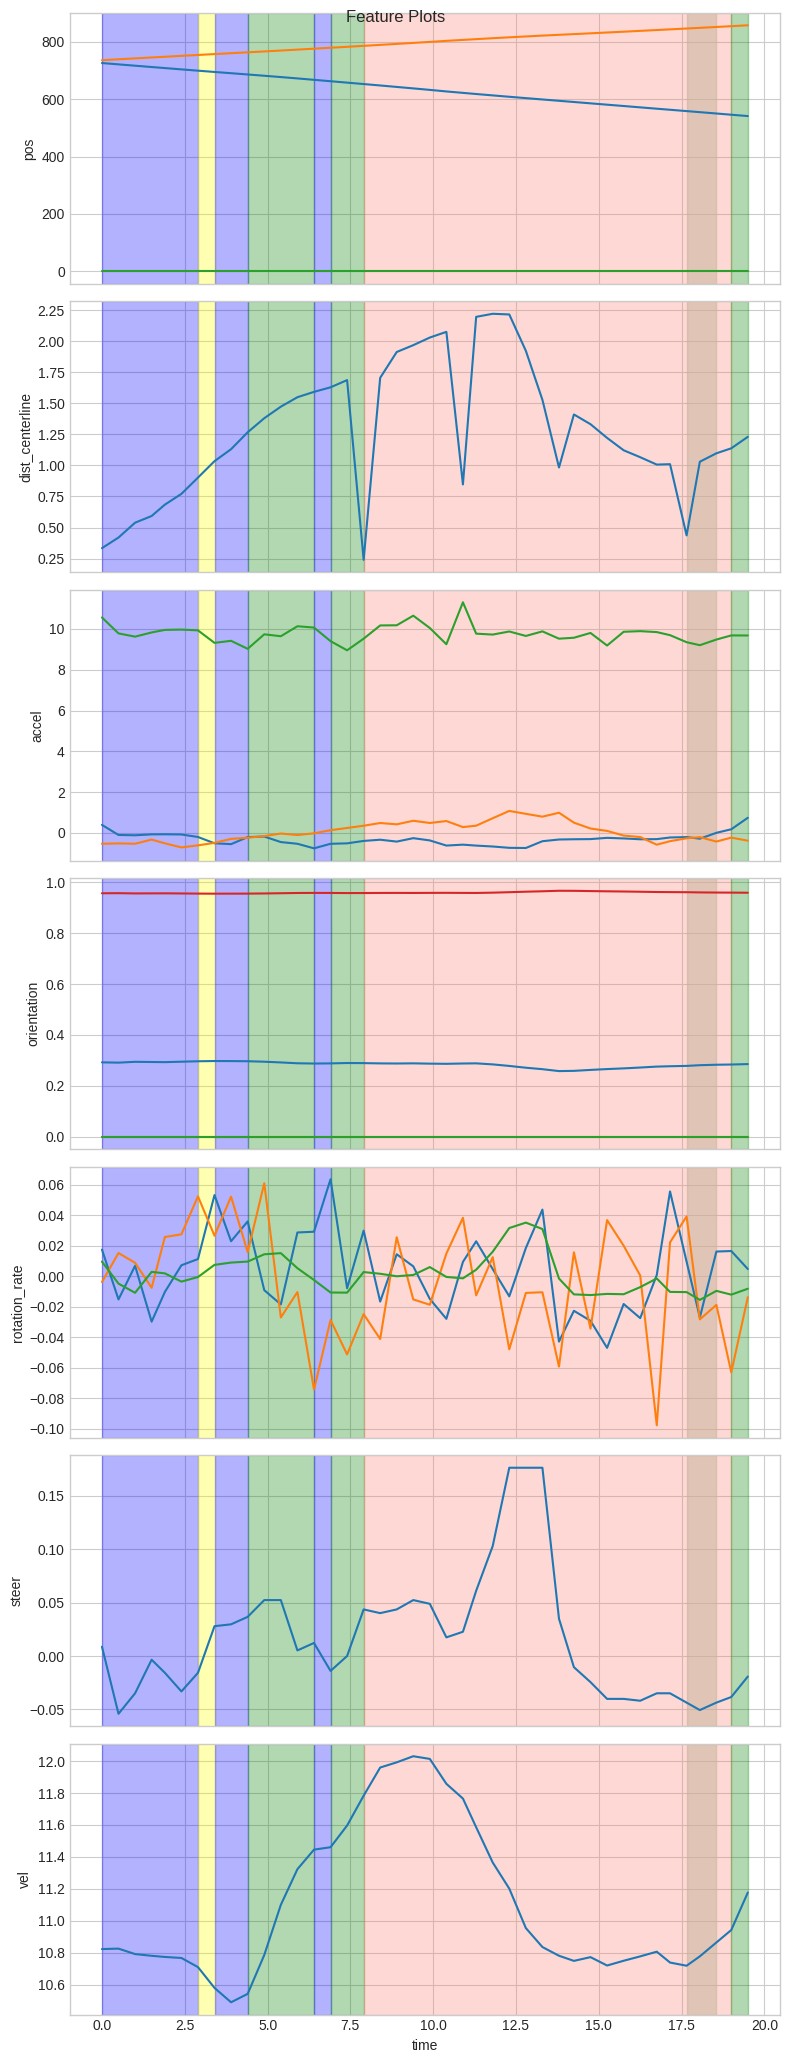

[{'token': '9f03829b02694c17a98fbcb20a9d66cc', 'accel': [0.3943588894038742, -0.5307550746520551, 10.563188952790227], 'orientation': [0.2924003434828191, 0.0, 0.0, 0.956295999746485], 'pos': [726.091813570865, 736.0424022749032, 0.0], 'rotation_rate': [0.01745702512562275, -0.00377196678891778, 0.009594745934009552], 'vel': 10.82420085154954, 'steer': 0.008726646259971648, 'anns': [{'category': 'vehicle.car', 'pos': (680.237, 767.521)}, {'category': 'human.pedestrian.adult', 'pos': (711.246, 737.614)}, {'category': 'human.pedestrian.adult', 'pos': (710.903, 737.096)}, {'category': 'vehicle.car', 'pos': (671.436, 769.632)}], 'dist_centerline': 0.33389823411182307, 'closest_lane': '04275473-4cc9-457f-9475-5411a8361e70', 'time': 0.0}, {'token': 'b0dd4347abd74b6aa1b33e813b4e2d44', 'accel': [-0.09948001684623473, -0.5136254243852961, 9.782244682602402], 'orientation': [0.2912208603814725, 0.0, 0.0, 0.9566558474596154], 'pos': [721.4574531487615, 739.1775685004293, 0.0], 'rotation_rate': [-

In [3]:
s.plot_actions()
print(s.data)

In [4]:
s.output_data()

output_data


[([726.091813570865, 736.0424022749032, 0.0],
  [{'category': 'vehicle.car', 'pos': (680.237, 767.521)},
   {'category': 'human.pedestrian.adult', 'pos': (711.246, 737.614)},
   {'category': 'human.pedestrian.adult', 'pos': (710.903, 737.096)},
   {'category': 'vehicle.car', 'pos': (671.436, 769.632)}],
  'drive straight'),
 ([721.4574531487615, 739.1775685004293, 0.0],
  [{'category': 'vehicle.car', 'pos': (674.491, 771.222)},
   {'category': 'human.pedestrian.adult', 'pos': (711.153, 737.644)},
   {'category': 'human.pedestrian.adult', 'pos': (710.778, 737.136)},
   {'category': 'vehicle.car', 'pos': (671.338, 769.594)}],
  'drive straight'),
 ([716.8099962923563, 742.3385706906422, 0.0],
  [{'category': 'vehicle.car', 'pos': (668.272, 775.126)},
   {'category': 'human.pedestrian.adult', 'pos': (711.059, 737.674)},
   {'category': 'human.pedestrian.adult', 'pos': (710.654, 737.175)},
   {'category': 'vehicle.car', 'pos': (671.24, 769.555)}],
  'drive straight'),
 ([712.2023898566175,

In [9]:
s.data

[{'token': '9f03829b02694c17a98fbcb20a9d66cc',
  'accel': [0.3943588894038742, -0.5307550746520551, 10.563188952790227],
  'orientation': [0.2924003434828191, 0.0, 0.0, 0.956295999746485],
  'pos': [726.091813570865, 736.0424022749032, 0.0],
  'rotation_rate': [0.01745702512562275,
   -0.00377196678891778,
   0.009594745934009552],
  'vel': 10.82420085154954,
  'steer': 0.008726646259971648,
  'anns': [{'category': 'vehicle.car', 'pos': (680.237, 767.521)},
   {'category': 'human.pedestrian.adult', 'pos': (711.246, 737.614)},
   {'category': 'human.pedestrian.adult', 'pos': (710.903, 737.096)},
   {'category': 'vehicle.car', 'pos': (671.436, 769.632)}],
  'dist_centerline': 0.33389823411182307,
  'closest_lane': '04275473-4cc9-457f-9475-5411a8361e70',
  'time': 0.0},
 {'token': 'b0dd4347abd74b6aa1b33e813b4e2d44',
  'accel': [-0.09948001684623473, -0.5136254243852961, 9.782244682602402],
  'orientation': [0.2912208603814725, 0.0, 0.0, 0.9566558474596154],
  'pos': [721.4574531487615, 73

In [8]:
plt.ioff()
s.render_actions_map('%s.gif' % s.scene_name)
plt.ion()

/home/muyang/miniconda3/envs/nuscenes/lib/python3.7/site-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])
/home/muyang/miniconda3/envs/nuscenes/lib/python3.7/site-packages/nuscenes/map_expansion/map_api.py:1012: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


In [2]:
scene_names = []
for i in range(2000):
    if i in nusc_can.can_blacklist:
        continue
    scene_name = 'scene-%s' % str(i).zfill(4)
    scene = [ i for i in nusc.scene if scene_name in i['name'].lower() ]
    if len(scene) > 0:
        scene_names.append(scene_name)

scene_names

['scene-0001',
 'scene-0002',
 'scene-0003',
 'scene-0004',
 'scene-0005',
 'scene-0006',
 'scene-0007',
 'scene-0008',
 'scene-0009',
 'scene-0010',
 'scene-0011',
 'scene-0012',
 'scene-0013',
 'scene-0014',
 'scene-0015',
 'scene-0016',
 'scene-0017',
 'scene-0018',
 'scene-0019',
 'scene-0020',
 'scene-0021',
 'scene-0022',
 'scene-0023',
 'scene-0024',
 'scene-0025',
 'scene-0026',
 'scene-0027',
 'scene-0028',
 'scene-0029',
 'scene-0030',
 'scene-0031',
 'scene-0032',
 'scene-0033',
 'scene-0034',
 'scene-0035',
 'scene-0036',
 'scene-0038',
 'scene-0039',
 'scene-0041',
 'scene-0042',
 'scene-0043',
 'scene-0044',
 'scene-0045',
 'scene-0046',
 'scene-0047',
 'scene-0048',
 'scene-0049',
 'scene-0050',
 'scene-0051',
 'scene-0052',
 'scene-0053',
 'scene-0054',
 'scene-0055',
 'scene-0056',
 'scene-0057',
 'scene-0058',
 'scene-0059',
 'scene-0060',
 'scene-0061',
 'scene-0062',
 'scene-0063',
 'scene-0064',
 'scene-0065',
 'scene-0066',
 'scene-0067',
 'scene-0068',
 'scene-00

In [3]:
scenes = []
for i,scene_name in enumerate(scene_names):
    s = Scene(scene_name)
    scenes.append(s)
    s.extract_data(map=False)
    s.segment_actions(primitive=True)
    print(i, s.prim_actions)


0 [{'label': 'turn left', 'index': 0, 'time': 0.0}, {'label': 'accelerate', 'index': 6, 'time': 3.100987}, {'label': 'drive straight', 'index': 9, 'time': 4.4999769999999994}, {'label': 'decelerate', 'index': 10, 'time': 4.999306}, {'label': 'drive straight', 'index': 18, 'time': 9.098956}, {'label': 'accelerate', 'index': 19, 'time': 9.599376}, {'label': 'drive straight', 'index': 28, 'time': 14.099924}, {'label': 'accelerate', 'index': 38, 'time': 18.999703999999998}, {'label': 'END', 'index': 39, 'time': 19.49957}]
1 [{'label': 'turn left', 'index': 0, 'time': 0.0}, {'label': 'accelerate', 'index': 13, 'time': 6.451377}, {'label': 'drive straight', 'index': 18, 'time': 9.000525}, {'label': 'decelerate', 'index': 20, 'time': 9.949961}, {'label': 'accelerate', 'index': 29, 'time': 14.599253}, {'label': 'END', 'index': 39, 'time': 19.500185}]
2 [{'label': 'stop', 'index': 0, 'time': 0.0}, {'label': 'accelerate', 'index': 5, 'time': 2.450172}, {'label': 'drive straight', 'index': 10, 't

In [ ]:
total = [76, 185, 328, 632, 778, 1089]
valid = [778]
bad = [76, 185, 328, 632, 1089]


uturn_scene = [ i for i in scenes if i.scene_name == 'scene-1089' ][0]
uturn_scene.plot_actions()


In [ ]:
plt.ioff()
uturn_scene.render_actions_map("%s.gif" % uturn_scene.scene_name)